In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from PIL import Image

In [93]:
DATA_DIR = '../data/UnBiasedEmo/images'
OUTPUT_DIR = '../dataset/UnBiasedEmo'

In [94]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [51]:
# dir_categories = {"anger", "fear", "joy", "love", "sadness", "surprise"}
dir_categories = {0: "anger", 2: "fear", 3: "joy", 7: "love", 4: "sadness", 5: "surprise"}

In [110]:
def load_data():
    data = pd.DataFrame(columns=['emotion', 'image'])
    for key, category in dir_categories.items():
        for subdir, _, files in os.walk(os.path.join(DATA_DIR, category)):
            for file in files:
                image = Image.open(os.path.join(subdir, file))
                image = image.resize((48, 48), Image.ANTIALIAS)
                grey = np.array(image.convert('L')).flatten()
                grey_str = ' '.join(map(str, grey))
                data = data.append({'emotion': key, 'image': grey_str}, ignore_index=True)
    return data

In [111]:
data = load_data()

In [112]:
data.head()

,emotion,image
0,0,25 24 25 22 22 34 44 32 27 28 20 34 31 18 35 4...
1,0,32 32 30 31 33 40 46 52 55 54 47 37 31 29 40 5...
2,0,1 1 1 1 1 1 1 1 1 1 1 1 1 3 86 107 100 76 42 3...
3,0,162 155 130 92 71 61 46 38 50 67 85 100 92 102...
4,0,112 114 117 119 123 127 131 133 134 133 129 12...


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 2 columns):
emotion    3045 non-null object
image      3045 non-null object
dtypes: object(2)
memory usage: 47.7+ KB


In [114]:
data['emotion'].value_counts()

4    758
7    650
3    587
5    457
0    440
2    153
Name: emotion, dtype: int64

In [115]:
emotions_count = data['emotion'].value_counts()
emotions_count.index = emotions_count.index.map(dir_categories)
emotions_count

sadness     758
love        650
joy         587
surprise    457
anger       440
fear        153
Name: emotion, dtype: int64

In [118]:
def visualize_emotions(n=4):
    i = np.random.randint(0, data.shape[0], n)
    plt.figure(figsize=(15, 15))
    for j, idx in enumerate(i):
        plt.subplot(n//4+1, 4, j+1)
        img = np.array(data['image'][idx].split(' ')).astype('int').reshape(48, 48)
        plt.imshow(img, cmap='gray')
        plt.title(dir_categories[data.iloc[idx]['emotion']])
        plt.axis('off')

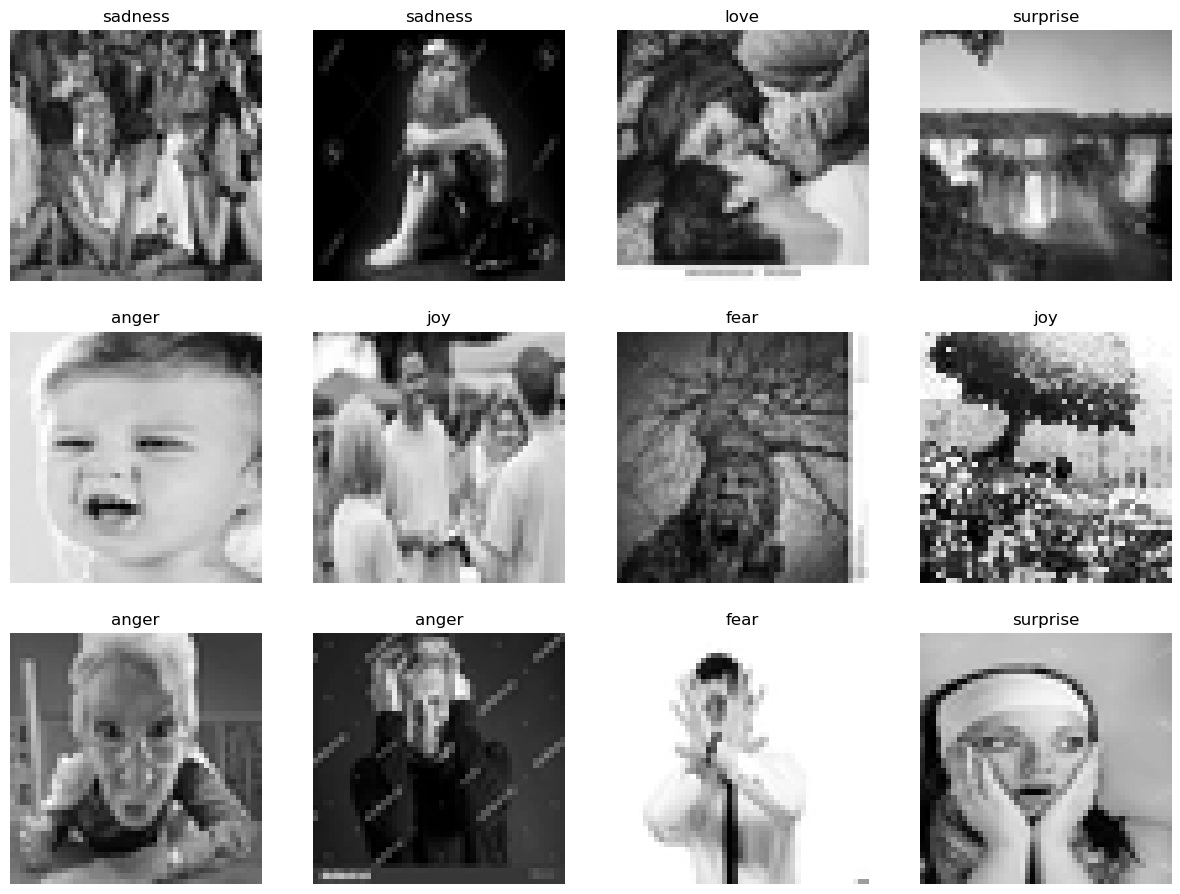

In [119]:
visualize_emotions(12)

In [120]:
def organize_data():
    train_dir = os.path.join(OUTPUT_DIR, 'train/')
    val_dir = os.path.join(OUTPUT_DIR, 'val/')
    test_dir = os.path.join(OUTPUT_DIR, 'test/')
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # split data into train, val, test
    df = data.sample(frac=1).reset_index(drop=True)
    train_data = df[:int(0.7*data.shape[0])]
    val_data = df[int(0.7*data.shape[0]):int(0.85*data.shape[0])]
    test_data = df[int(0.85*data.shape[0]):]
    
    # save data
    train_data.to_csv(os.path.join(train_dir, 'train.csv'), index=False)
    val_data.to_csv(os.path.join(val_dir, 'val.csv'), index=False)
    test_data.to_csv(os.path.join(test_dir, 'test.csv'), index=False)

In [121]:
organize_data()